In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from plotnine import *
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:

course = pd.read_csv('courses.csv')
assesment = pd.read_csv('assessments.csv')
vle = pd.read_csv('vle.csv')
info_student = pd.read_csv('studentInfo.csv')
reg_student = pd.read_csv('studentRegistration.csv')
asses_student = pd.read_csv('studentAssessment.csv')
vle_student = pd.read_csv('studentVle.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
course

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [ ]:
course.head()


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [ ]:
course.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [ ]:
assesment

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [ ]:
assesment.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [ ]:
assesment.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [ ]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [ ]:
vle.head()


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [ ]:
vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [ ]:
info_student

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [ ]:
info_student.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [ ]:
info_student.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [ ]:
reg_student

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [ ]:
reg_student.head()


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [ ]:
reg_student.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [ ]:
asses_student

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [ ]:
asses_student.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [ ]:
asses_student.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [ ]:
vle_student

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
1502451,BBB,2014J,585762,913680,-2,1
1502452,BBB,2014J,585762,913673,-2,1
1502453,BBB,2014J,586516,913689,-2,1
1502454,BBB,2014J,586516,913685,-2,1


In [ ]:
vle_student.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [ ]:
vle_student.describe()

,id_student,id_site,date,sum_click
count,1.502456e+06,1.502456e+06,1.502456e+06,1.502456e+06
mean,7.677129e+05,6.762373e+05,9.387672e+01,3.251121e+00
std,6.920374e+05,1.183274e+05,7.585742e+01,4.803370e+00
min,6.516000e+03,5.427920e+05,-2.400000e+01,1.000000e+00
25%,4.214550e+05,5.431490e+05,2.500000e+01,1.000000e+00
50%,5.548300e+05,7.037320e+05,8.100000e+01,2.000000e+00
75%,6.200920e+05,7.683480e+05,1.580000e+02,4.000000e+00
max,2.698257e+06,1.010323e+06,2.690000e+02,1.326000e+03


- kedua kolom "Modul kode" dan "Presentasi kode" digunakan bersama-sama untuk mengidentifikasi modul dengan unik. Oleh karena itu, kedua kolom ini akan digabungkan untuk membuat fitur yang dapat mengidentifikasi modul secara unik. Dengan kata lain, kombinasi dari nilai dalam kedua kolom tersebut akan menciptakan suatu fitur atau atribut baru yang dapat membedakan setiap modul secara unik dalam data.

In [ ]:


course["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), course.code_module, course.code_presentation))
assesment["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), assesment.code_module, assesment.code_presentation))
vle["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), vle.code_module, vle.code_presentation))
info_student["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), info_student.code_module, info_student.code_presentation))
reg_student["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), reg_student.code_module, reg_student.code_presentation))
vle_student["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), vle_student.code_module, vle_student.code_presentation))


print(" In Student Info table; \n # of rows: {} \n # of unique student Ids: {} \n \
Hence, There are different records for same students' different modul enrolments." .format(len(info_student),len(info_student.id_student.unique())))
print("\n This also means that student ID is not really a unique identifier of the table.\n")

 In Student Info table; 
 # of rows: 32593 
 # of unique student Ids: 28785 
 Hence, There are different records for same students' different modul enrolments.

 This also means that student ID is not really a unique identifier of the table.



# Preprocessing  Data

- Memeriksa nilai yang hilang pada vle

<Axes: >

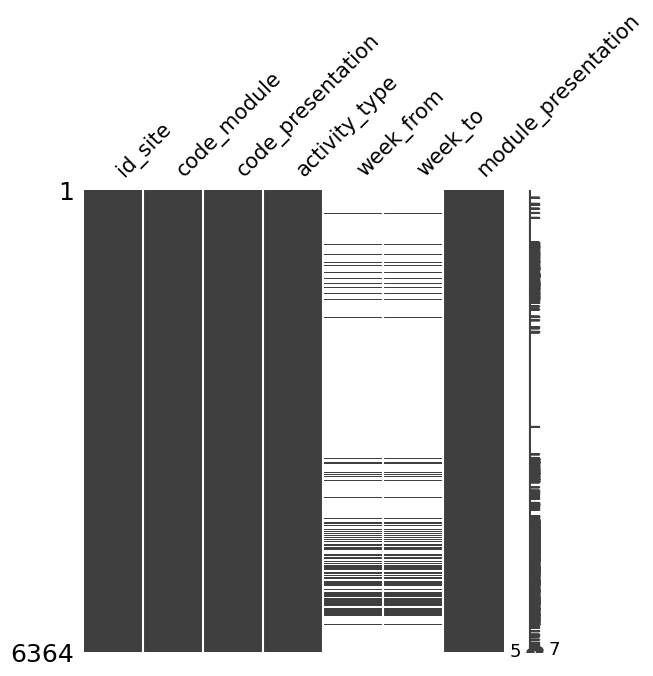

In [ ]:

msno.matrix(vle, figsize=(6,6), fontsize=15)

In [ ]:
vle.drop(columns=['week_from','week_to'],inplace=True)

<Axes: >

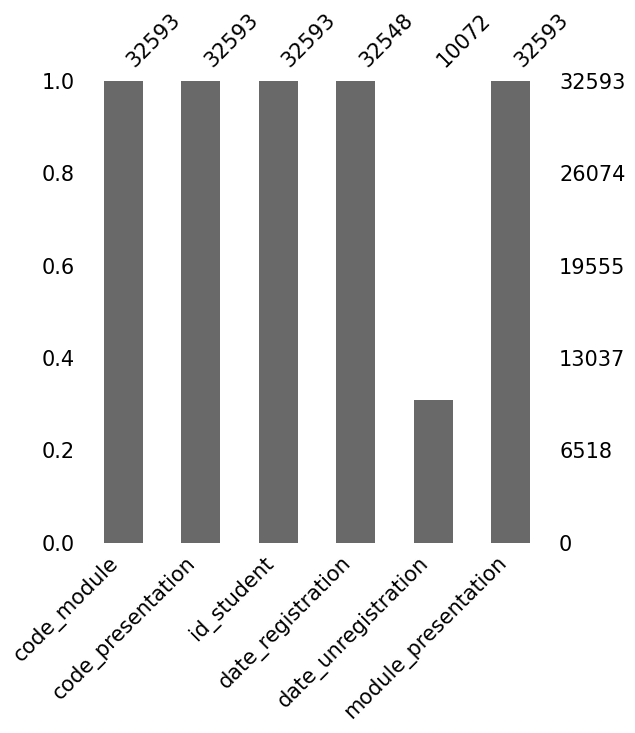

In [ ]:
msno.bar(reg_student, figsize=(6,6), fontsize=15)

- Cari mahasiswa yang belum tercatat dalam tabel registrasi. Selanjutnya, verifikasi konsistensinya dengan data akhir pada tabel StudentInfo. Jika seorang mahasiswa tidak terdaftar, status akhirnya harus ditetapkan sebagai 'Withdrawn'. Pilih mahasiswa yang tidak terdaftar berdasarkan tabel registrasi dan gabungkan untuk menampilkan baris yang sesuai. Tidak boleh ada mahasiswa yang tidak terdaftar tanpa status 'Withdrawn' pada kolom hasil akhir. Kesalahan semantik terjadi jika mahasiswa tidak terdaftar tanpa status 'Withdrawn

In [ ]:

temp = reg_student.loc[reg_student.date_unregistration.notna(),\
                               ['id_student','module_presentation','date_unregistration']]

temp =pd.merge(info_student, temp, on=['id_student','module_presentation'])

wrong_final_results=temp.loc[temp.final_result!='Withdrawn']
incorrect_final_results=wrong_final_results.index
wrong_final_results

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,date_unregistration
719,BBB,2013J,362907,F,South West Region,Lower Than A Level,20-30%,35-55,2,60,N,Fail,BBB_2013J,0.0
724,BBB,2013J,365288,F,South Region,A Level or Equivalent,70-80%,0-35,0,60,N,Fail,BBB_2013J,0.0
869,BBB,2013J,554243,F,South West Region,Lower Than A Level,60-70%,0-35,0,60,N,Fail,BBB_2013J,166.0
4961,DDD,2013J,315082,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,DDD_2013J,0.0
5010,DDD,2013J,403052,F,Yorkshire Region,HE Qualification,20-30%,0-35,0,150,N,Fail,DDD_2013J,0.0
5293,DDD,2013J,582954,M,London Region,Lower Than A Level,10-20,0-35,0,120,N,Fail,DDD_2013J,-7.0
7853,FFF,2013J,234004,M,Yorkshire Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,FFF_2013J,0.0
8001,FFF,2013J,523777,M,North Region,A Level or Equivalent,0-10%,35-55,1,60,N,Fail,FFF_2013J,0.0
8340,FFF,2013J,601640,M,London Region,HE Qualification,20-30%,0-35,0,90,N,Fail,FFF_2013J,-4.0


- Memperbaiki data akhir dalam tabel info_student.

In [ ]:

for i in wrong_final_results[['id_student','code_module','code_presentation']].values:
    info_student.loc[(info_student.id_student==i[0])&(info_student.code_module==i[1])&\
                 (info_student.code_presentation==i[2]),'final_result'] = 'Withdrawn'

- Memastikan konsistensi bobot penilaian dalam deskripsi tabel Penilaian. Bobot ujian harus mencapai 100%, sementara penilaian lainnya juga harus mencapai 100%. Sebagai hasilnya, total bobot untuk setiap modul_presentasi seharusnya 200.

In [ ]:

assesment.groupby(['code_module','code_presentation']).agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     100.0
            2014B                     100.0
            2014J                     100.0

- Dua modul, yaitu Modul CCC dengan total penambahan 300 dan Modul GGG dengan total penambahan 100, akan diinvestigasi.

In [ ]:

assesment[assesment.code_module.isin(["CCC","GGG"])]\
.groupby(['code_module','code_presentation',"assessment_type"]).agg(type_weights = ('weight',sum))

type_weights
code_module code_presentation assessment_type              
CCC         2014B             CMA                      25.0
                              Exam                    200.0
                              TMA                      75.0
            2014J             CMA                      25.0
                              Exam                    200.0
                              TMA                      75.0
GGG         2013J             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0
            2014B             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0
            2014J             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0

- Modul CCC mengalami inkonsistensi. Total bobot ujian mencapai 200%. Modul CCC memiliki dua ujian dalam setiap presentasi, sehingga mungkin dihitung sebagai 100% dua kali, bukan 50% dan 50%. Hal ini akan diperbaiki pada langkah berikutnya. Modul GGG juga tidak sesuai. Tidak ada bobot yang ditetapkan baik untuk TMA maupun CMA. Untuk konsistensi, bobot penugasan TMA akan dipertimbangkan hingga mencapai total 100%. Bobot ujian pada Modul CCC akan dikurangi setengahnya. Bobot penilaian TMA akan diatur hingga mencapai 100%."


In [ ]:

assesment.loc[(assesment.code_module=='CCC') &(assesment.assessment_type=='Exam'),'weight'] = \
assesment.loc[(assesment.code_module=='CCC') &(assesment.assessment_type=='Exam'),'weight']/2

assesment.loc[(assesment.code_module=='GGG') & (assesment.assessment_type=='TMA'),'weight']=(100/3)

- Membuat variabel baru dengan menggabungkan skor dan bobot tugas dari dua tabel menjadi satu tabel. Menggabungkan tabel dengan Penilaian dan Penilaian mahasiswa. Menghitung skor tertimbang untuk semua penilaian dari semua mahasiswa. Menghitung total skor dengan mengalikan skor dengan bobotnya dan kemudian membaginya dengan total bobot (terdapat beberapa mahasiswa dengan total bobot yang lebih tinggi atau lebih rendah dari 100%). Ini dilakukan untuk semua mahasiswa dari semua modul guna menghitung nilai akhir.

In [ ]:

joined=pd.merge(asses_student,assesment,on='id_assessment',how='left')
joined['score*weight']=(joined['score']*joined['weight'])


marks=joined.groupby(['id_student','code_module','code_presentation'],as_index=False)['score*weight','weight'].sum()

marks['adjusted_mark'] = marks['score*weight']/marks['weight']
marks["mark"]  = marks['score*weight']/200
marks.rename(columns = {'score*weight': 'total_score*weight', 'weight': 'attempted_weight'}, inplace=True)
marks = marks.round(1)

- Menyatukan tabel nilai dengan tabel info_student untuk membuat tabel yang lebih komprehensif, mencakup semua informasi relevan tentang prestasi akademik, karakteristik siswa, dan data demografis. Beberapa mahasiswa mungkin mencoba beberapa tugas tetapi kemudian memutuskan untuk tidak melanjutkan mata kuliahnya. Dalam hal ini, variabel nilai mungkin memiliki nilai untuk mahasiswa tersebut. Namun, nilai ini tidak boleh digunakan dalam analisis dan akan diganti dengan NaN

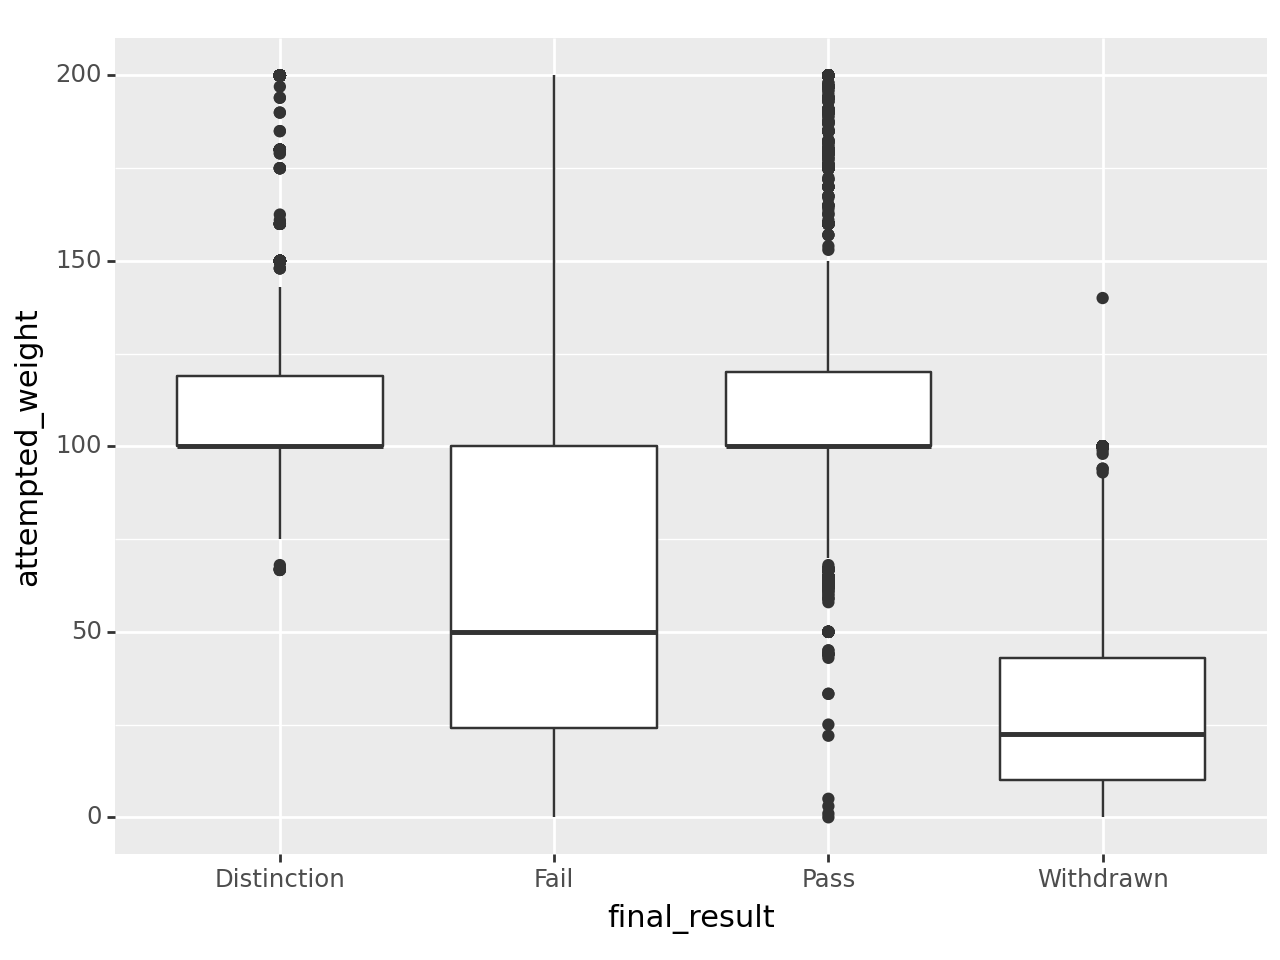

<Figure Size: (640 x 480)>

In [ ]:

joined = pd.merge(marks,info_student,on=['id_student','code_module','code_presentation'],how='left')


joined.loc[joined.final_result=='Withdrawn','mark']= np.nan
joined.loc[joined.final_result=='Withdrawn','adjusted_mark']= np.nan

ggplot(joined) + geom_boxplot(aes(x="final_result", y="attempted_weight"))

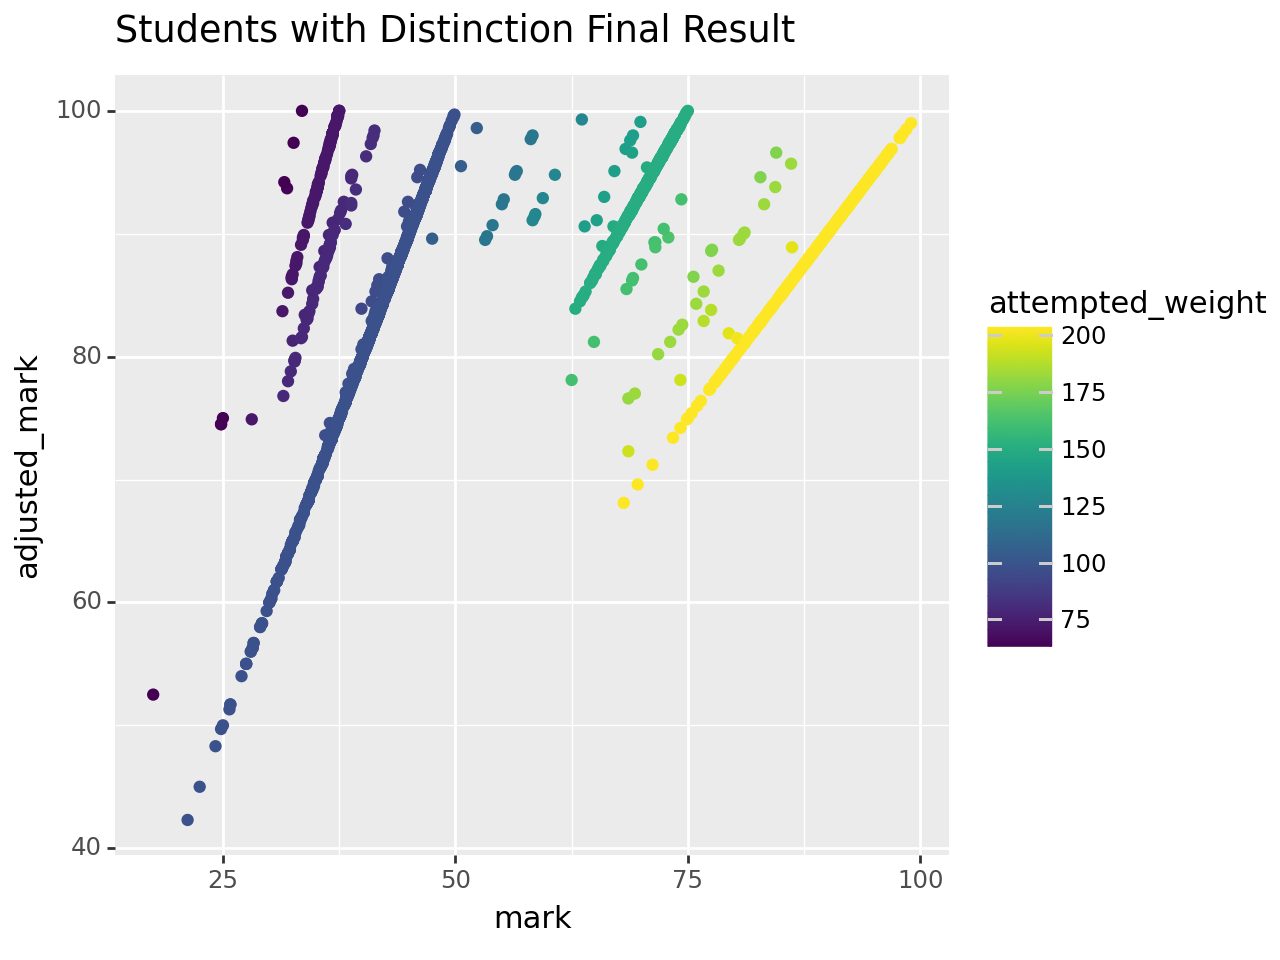

<Figure Size: (640 x 480)>

In [ ]:
ggplot(joined[joined.final_result=="Distinction"]) + geom_point(aes(x="mark", y="adjusted_mark", color="attempted_weight"))\
+ggtitle("Students with Distinction Final Result")

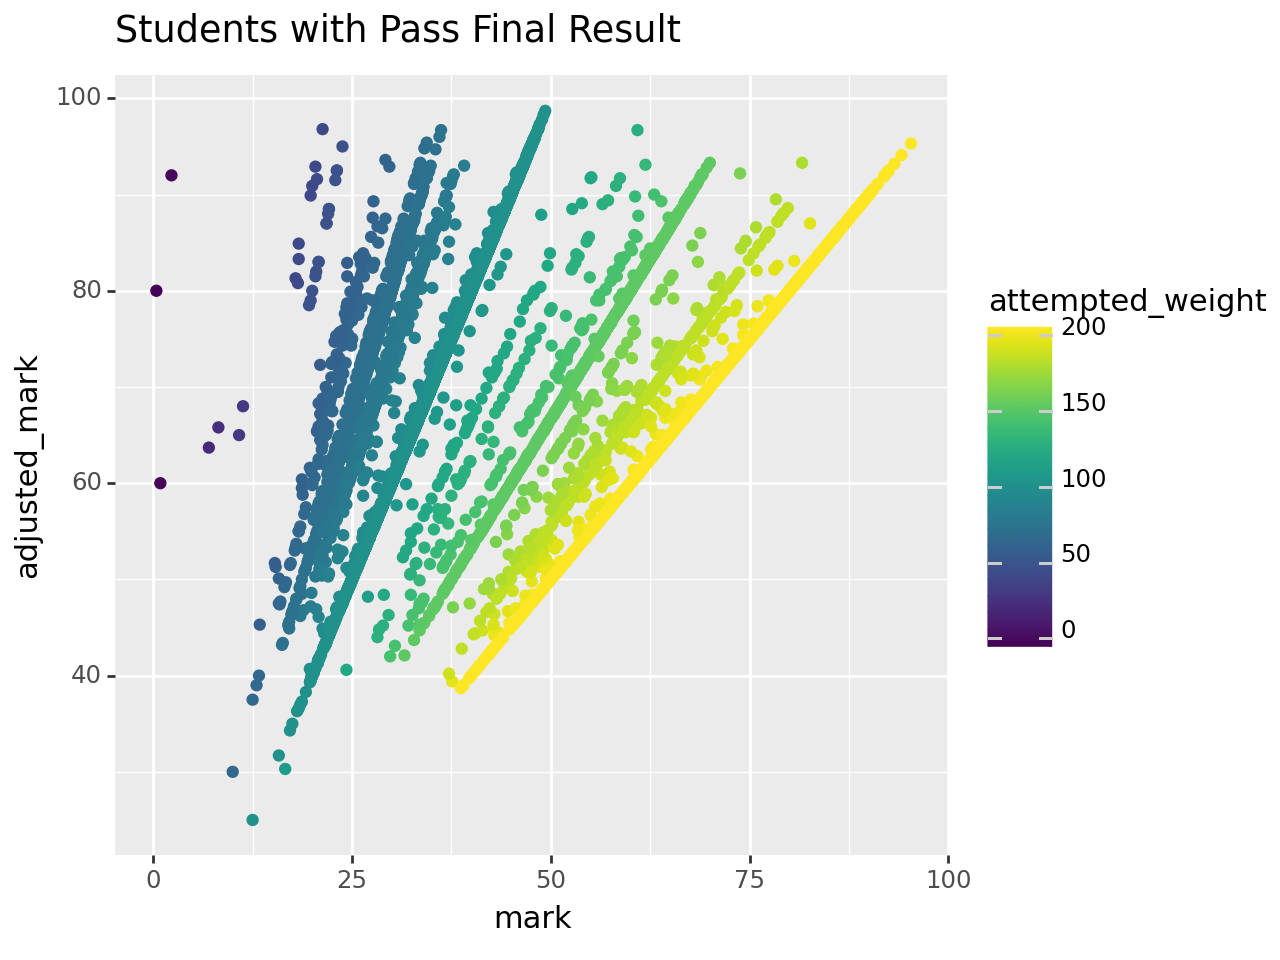

<Figure Size: (640 x 480)>

In [ ]:
ggplot(joined[joined.final_result=="Pass"]) + geom_point(aes(x="mark", y="adjusted_mark", color="attempted_weight"))\
+ggtitle("Students with Pass Final Result")

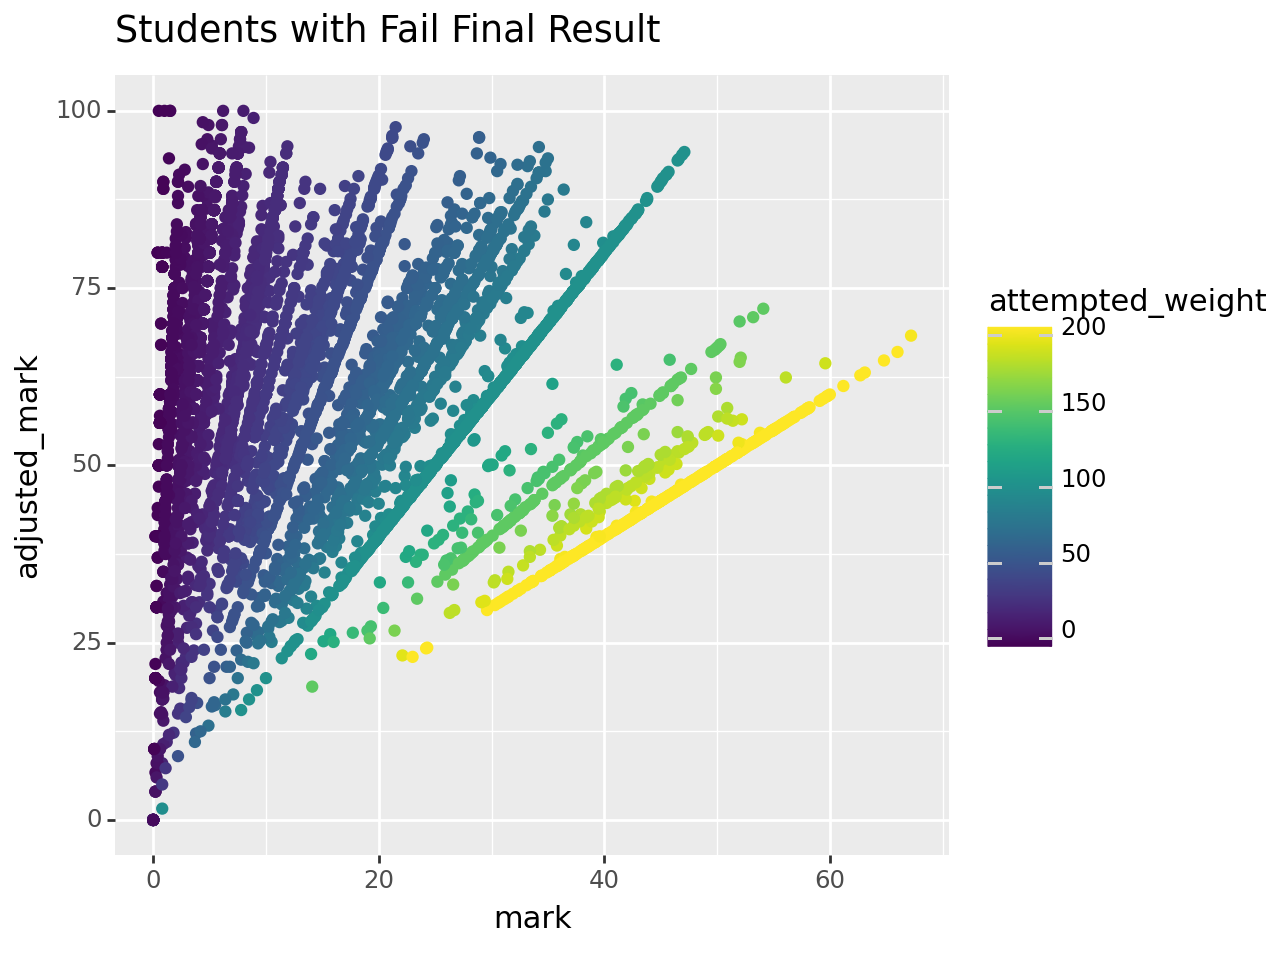

<Figure Size: (640 x 480)>

In [ ]:
ggplot(joined[joined.final_result=="Fail"]) + geom_point(aes(x="mark", y="adjusted_mark", color="attempted_weight"))\
+ggtitle("Students with Fail Final Result")

In [ ]:
distinction = joined[joined.final_result=="Distinction"].index
passing = joined[joined.final_result=="Pass"].index
fail = joined[joined.final_result=="Fail"].index
withdraw = joined[joined.final_result=="Withdraw"].index


attempt_weight200 = joined[joined.attempted_weight==200].index
attempt_weight150_200 = joined[(joined.attempted_weight>=150) & (joined.attempted_weight!=200)].index
attempt_weight0_150 = joined.index.difference(attempt_weight200).difference(attempt_weight150_200)

adj_mark80_100 = joined[joined.attempted_weight>=80].index
adj_mark70_80 = joined[(joined.attempted_weight>=70) & (joined.attempted_weight<80)].index
adj_mark0_70 = joined[joined.attempted_weight<70].index

mark40_100 = joined[joined.attempted_weight>=40].index
mark0_40 = joined[joined.attempted_weight<40].index

- Mahasiswa yang memiliki attempted_weight sebesar 200. Mahasiswa dengan attempted_weight antara 150 hingga 200. Siswa yang memiliki attempted_weight kurang dari 150 akan diurutkan dan adj_mark akan disesuaikan seperti yang dijelaskan sebelumnya.

In [ ]:

joined.loc[(attempt_weight200) & (adj_mark80_100), "final_result"] = "Distinction"
joined.loc[(attempt_weight200) & (adj_mark70_80), "final_result"] = "Pass"
joined.loc[(attempt_weight200) & (adj_mark0_70), "final_result"] = "Fail"


joined.loc[(attempt_weight150_200) & (passing) & (adj_mark80_100), "final_result"] = "Distinction"
joined.loc[(attempt_weight150_200) & (fail) & (mark40_100), "final_result"] = "Pass"
joined.loc[(attempt_weight150_200) & (fail) & (mark40_100), "adjusted_mark"] = joined.loc[(attempt_weight150_200) & (fail) & (mark40_100), "mark"]

joined.loc[joined.loc[(attempt_weight0_150) & (distinction)].mark.sort_values().index,"adjusted_mark"] = np.arange(70.0, 100.0, 30/len(joined.loc[(attempt_weight0_150) & (distinction)]))
joined.loc[joined.loc[(attempt_weight0_150) & (passing)].mark.sort_values().index,"adjusted_mark"] = np.arange(40.0, 70.0, 30/len(joined.loc[(attempt_weight0_150) & (passing)]))
joined.loc[joined.loc[(attempt_weight0_150) & (fail)].mark.sort_values().index,"adjusted_mark"] = np.arange(0.0, 40.0, 40/len(joined.loc[(attempt_weight0_150) & (fail)]))

df = joined